# PROYECTO – ENTREGA #3

Universidad de los Andes  
Ingeniería de Sistemas y Computación  
Modelado, Simulación y Optimización

* Esteban Castelblanco Gómez – 202214942
* Juan Miguel Delgado – 202314903
* Omar Mauricio Urrego Vásquez – 202211641
* Juan Felipe Lancheros Carrillo – 202211004

## 1. Descripción del Problema
### 1.1. Formulación matemática del CVRP
A continuación, se detalla cada elemento de la formulación base, manteniendo las simplificaciones realizadas en la anterior entrega y alineándose con lo solicitado para esta etapa.

* $D = \{CD01\} = \{1\}$: Conjunto unitario que representa el único centro de distribución de la red (índice: $i \in D$).
* $C  = \{C001, C002, ..., Cn\} = \{1, 2, ..., n\}$: Conjunto que representa los clientes de la red (índices: $j, l \in C$).
* $N = D \cup C$: Representa todos los nodos de la red  (índices: $p, q \in D \cup C$)
* $K$: Conjunto de vehículos (índice: $k \in K$) disponibles en la flota: $K = \{V001, V002, ..., Vm\} = \{1, 2, ..., m\}$.
  * Se asume que un vehículo podría distribuir recursos a varios clientes en un mismo viaje si tiene la capacidad requerida.

Nota: Se asume que cada tipo de nodo que conforma la red (el centro de distribución y los clientes) debe representarse como un conjunto por separado, debido a que, en el repositorio, cada uno de ellos tiene identificadores propios (ClientID y DepotID).

### 1.2. Características de la instancia base

### 1.2.1. Parámetros
* $Latitude_p \equiv Latitude_q$ (adimensional): Primer tipo de coordenada geográfica angular de un nodo de la red.
* $Longitude_p \equiv Longitude_q$ (adimensional): Segundo tipo de coordenada geográfica angular de un nodo de la red.
* $LocationID_p \equiv LocationID_q$ (adimensional): Hace referencia a una combinación única de valores correspondientes a los parámetros que representan la latitud y la longitud.
* $Demand_j \equiv Demand_l$ (kg): Cantidad de masa requerida por un cliente.
* $Capacity_k$ (kg): Capacidad máxima de carga de un vehículo.
* $Range_k$ (km): Distancia máxima que recorre un vehículo sin recargar combustible.
* $FuelEfficiency_k$ (km/galón): Eficiencia del uso de combustible de un vehículo.
  * Se toma como referencia el siguiente valor (obtenido del repositorio): 30 km/galón.
* $C^{fuel}$ (COP/galón): Costo del combustible.
  * Se asume que hay un único tipo de combustible.
  * No tiene índice porque tiene un valor fijo en todos los casos.
    * Se toma como referencia el siguiente valor (obtenido del repositorio): 16300 COP/galón.
* $C^{dist}_k$ (COP/km): El valor a pagar por cada kilómetro que recorre un vehículo particular no es considerado en el caso base ya que no hace parte de la estructura básica de costos que debemos considerar, mostrada en el repositorio.
* $C^{maintenance}$ (COP/km): Valor de mantenimiento a pagar basado en la distancia recorrida.
  * No tiene índice porque tiene un valor fijo en todos los casos.
  * Se debe investigar e incorporar al archivo parameters_base.csv del repositorio.
* $C^{time}_k$ (COP/hora): Costo operativo (salario de un conductor) por hora del vehículo $k$.
  * Se debe investigar (TuSalario.org) e incorporar al archivo parameters_base.csv del repositorio.
  * Se asume que es un valor fijo.
* $d_{pq}$ (km): Distancia que conecta un nodo $p$ con un nodo $q$.
  * Sus valores se obtienen del preprocesamiento.
* $t_{pq}$ (horas): Tiempo que toma un vehículo en llegar de un nodo $p$ a un nodo $q$.
  * Sus valores se obtienen del preprocesamiento.
* $C^{fixed}_k$ (COP/vehículo): El costo fijo de activación de un vehículo particular no es considerado en el caso base ya que no hace parte de la estructura básica de costos que debemos considerar, mostrada en el repositorio.
* $VehicleQuantity$: Representa la cantidad de vehículos disponibles.
  * No tiene índice porque tiene un valor fijo en todos los casos.
  * Se calcula al contar la cantidad de vehículos presentes en el archivo csv de entrada.
  * Se asume que todos los vehículos deben ser usados.

### 1.2.2. Variables de decisión
* $x_{pqk} \in \{0, 1\}$: Representa si un vehículo $k$ fue asignado para transportarse entre un nodo $p$ a un nodo $q$..

### 1.2.3. Función objetivo
$$\min{(\sum_{p \in D \cup C}{\sum_{q \in D \cup C}{\sum_{k \in K}{(([A]) * [B]) * x_{pqk}}}})}$$
* $[A]$: $\frac{C^{fuel}}{FuelEfficiency_k} + C^{maintenance}$
* $[B]$: $d_{pq} + C^{time}_k * t_{pq}$

### 1.3. Restricciones y consideraciones
a) Los vehículos deben salir del centro de distribución.
$$\sum_{j \in C}{\sum_{k \in K}{x_{ijk}}} = VehicleQuantity \quad \forall{i \in D}$$
b) Todos los vehículos deben volver al centro de distribución.
$$\sum_{j \in C}{\sum_{k \in K}{x_{ijk}}} - \sum_{j \in C}{\sum_{k \in K}{x_{jik}}} = 0 \quad \forall{i \in D}$$
c) Los clientes deben ser visitados una única vez.
$$\sum_{p \in D \cup C}{\sum_{k \in K}{x_{pjk}}} = 1 \quad \forall{j \in C}$$
d) Cualquier vehículo que llegue/pase por un cliente debe salir de ahí, es decir que ningún vehículo debe terminar su ruta en un cliente.
$$\sum_{p \in D \cup C}{x_{pjk}} - \sum_{p \in D \cup C}{x_{jpk}} = 0 \quad \forall{j \in C} \quad \forall{k \in K}$$
e) El total de distancia que recorre un vehículo en una ruta debe ser menor o igual a su autonomía, es decir que no debe tener el requerimiento de tanquear durante el viaje.
$$\sum_{p \in D \cup C}{\sum_{q \in D \cup C}{x_{pqk} * d_{pq}}} \le Range_k \quad \forall{k \in K}$$
f) La demanda que satisface un vehículo debe ser menor o igual a su capacidad máxima de peso para evitar que colapse.  
$$\sum_{p \in D \cup C}{\sum_{j \in C}{x_{pjk} * Demand_j}} \le Capacity_k \quad \forall{k \in K}$$
g) Un vehículo podría pasar por un trayecto desde un nodo a otro o viceversa. Si pasó por un trayecto específico y vuelve a pasar por el mismo en el sentido contrario, no debería volver a pasar por dicho terreno.
$$x_{pqk} + x_{qpk} \le 2 \quad \forall{p, q \in D \cup C} \quad \forall{k \in K}$$
h) No deben haber trayectorias que no representen desplazamientos significativos.
$$x_{pqk} = 0 \quad \forall{p, q \in D \cup C | p=q} \quad \forall{k \in K}$$

## 2. Método Implementado


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import time
import csv
from collections import defaultdict
from copy import deepcopy

class GeneticAlgorithmMTSP:
    """
    Genetic Algorithm for Multiple Traveling Salesman Problem (MTSP) with multiple depots.

    This implementation uses advanced crossover and mutation operators specifically designed
    for MTSP as recommended in academic literature.
    """

    def __init__(self, cost_matrix, num_cities, num_travelers=3, depots=None,
                 population_size=100, generations=500, mutation_rate=0.2,
                 crossover_rate=0.8, elitism_rate=0.1, tournament_size=5):
        """
        Initialize the Genetic Algorithm solver.

        Args:
            cost_matrix (np.array): Square matrix of costs between cities
            num_cities (int): Total number of cities including depots
            num_travelers (int): Number of travelers/salesmen
            depots (list): List of depot indices (1-indexed), defaults to [1]
            population_size (int): Size of the population
            generations (int): Maximum number of generations
            mutation_rate (float): Probability of mutation
            crossover_rate (float): Probability of crossover
            elitism_rate (float): Proportion of elite solutions to keep
            tournament_size (int): Size of tournament for selection
        """
        self.cost_matrix = cost_matrix
        self.num_cities = num_cities
        self.num_travelers = num_travelers

        # Default to node 1 if no depots are specified (1-indexed)
        if depots is None:
            self.depots = [1]
        else:
            self.depots = depots

        # Create a set of non-depot cities (1-indexed)
        self.non_depots = [i for i in range(1, num_cities + 1) if i not in self.depots]

        # GA parameters
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.elitism_rate = elitism_rate
        self.tournament_size = tournament_size

        # Results storage
        self.best_solution = None
        self.best_fitness = float('inf')
        self.fitness_history = []
        self.best_solution_history = []
        self.population = []

    def initialize_population(self):
        """
        Create an initial population of random solutions.

        Each solution is represented as a list of routes, one for each traveler.
        Each route is a sequence of cities (excluding the depot, which is implicit at start and end).
        """
        population = []

        for _ in range(self.population_size):
            # Create a random solution
            solution = self._create_random_solution()
            population.append(solution)

        self.population = population
        return population

    def _create_random_solution(self):
        """
        Create a random valid solution.

        Returns:
            List of routes, one per traveler. Each route is a list of cities.
        """
        # Make a copy of non-depot cities that need to be visited
        cities_to_visit = self.non_depots.copy()
        random.shuffle(cities_to_visit)

        # Partition the cities among travelers
        routes = [[] for _ in range(self.num_travelers)]

        # Two strategies: either distribute evenly or randomly
        if random.random() < 0.5:  # Distribute evenly
            cities_per_traveler = len(cities_to_visit) // self.num_travelers
            remainder = len(cities_to_visit) % self.num_travelers

            start_idx = 0
            for i in range(self.num_travelers):
                # Add one extra city to some travelers if there's a remainder
                extra = 1 if i < remainder else 0
                end_idx = start_idx + cities_per_traveler + extra
                routes[i] = cities_to_visit[start_idx:end_idx]
                start_idx = end_idx
        else:  # Distribute randomly but ensure each traveler has at least one city if possible
            min_cities = min(1, len(cities_to_visit) // self.num_travelers)

            # First, ensure minimum cities per traveler
            for i in range(self.num_travelers):
                if len(cities_to_visit) >= min_cities:
                    routes[i] = cities_to_visit[:min_cities]
                    cities_to_visit = cities_to_visit[min_cities:]

            # Then distribute remaining cities randomly
            while cities_to_visit:
                traveler_idx = random.randint(0, self.num_travelers - 1)
                routes[traveler_idx].append(cities_to_visit.pop(0))

        # Optimize each traveler's route with a random 2-opt improvement
        for i in range(self.num_travelers):
            if len(routes[i]) > 3:  # Only worth optimizing if route has enough cities
                routes[i] = self._random_2opt(routes[i])

        return routes

    def _random_2opt(self, route, iterations=5):
        """
        Apply a simple 2-opt local search to improve a single route.
        Only performs a few iterations to maintain diversity in the population.
        """
        best_route = route.copy()
        best_cost = self._route_cost(best_route)

        for _ in range(iterations):
            if len(route) < 4:
                break

            # Select random segment to reverse
            i, j = sorted(random.sample(range(len(route)), 2))

            # Apply 2-opt: reverse the segment between i and j
            new_route = best_route[:i] + best_route[i:j+1][::-1] + best_route[j+1:]
            new_cost = self._route_cost(new_route)

            if new_cost < best_cost:
                best_route = new_route
                best_cost = new_cost

        return best_route

    def _route_cost(self, route):
        """Calculate the cost of a single route including return to depot."""
        if not route:  # Empty route
            return 0

        # Default depot is the first one in the list
        depot = self.depots[0]

        # Start at depot, visit all cities in route, return to depot
        cost = self.cost_matrix[depot-1][route[0]-1]  # From depot to first city

        for i in range(len(route) - 1):
            cost += self.cost_matrix[route[i]-1][route[i+1]-1]

        cost += self.cost_matrix[route[-1]-1][depot-1]  # Return to depot
        return cost

    def evaluate_fitness(self, solution):
        """Calculate the fitness (total cost) of a solution."""
        total_cost = 0

        for route in solution:
            total_cost += self._route_cost(route)

        return total_cost

    def select_parents(self):
        """
        Select parents using tournament selection.

        Returns:
            Two parent solutions
        """
        def tournament():
            participants = random.sample(range(len(self.population)), self.tournament_size)
            participants_fitness = [(p, self.evaluate_fitness(self.population[p])) for p in participants]
            winner = min(participants_fitness, key=lambda x: x[1])[0]
            return self.population[winner]

        parent1 = tournament()
        parent2 = tournament()
        return parent1, parent2

    def crossover(self, parent1, parent2):
        """
        Perform crossover between two parents.

        This uses a specialized route-based crossover operator for MTSP:
        1. Route Exchange Crossover - exchanges whole routes between parents
        2. Route Merge Crossover - merges routes between parents and redistributes cities

        Returns:
            Two child solutions
        """
        if random.random() > self.crossover_rate:
            return deepcopy(parent1), deepcopy(parent2)

        # Choose crossover type: route exchange or route merge
        if random.random() < 0.5:
            return self._route_exchange_crossover(parent1, parent2)
        else:
            return self._route_merge_crossover(parent1, parent2)

    def _route_exchange_crossover(self, parent1, parent2):
        """
        Route Exchange Crossover: exchanges complete routes between parents.

        This preserves good routes while creating new combinations.
        """
        child1 = deepcopy(parent1)
        child2 = deepcopy(parent2)

        if self.num_travelers < 2:
            return child1, child2

        # Select random routes to exchange
        num_routes_to_exchange = random.randint(1, max(1, self.num_travelers // 2))
        routes_to_exchange = random.sample(range(self.num_travelers), num_routes_to_exchange)

        # Exchange the selected routes
        for route_idx in routes_to_exchange:
            child1[route_idx], child2[route_idx] = child2[route_idx], child1[route_idx]

        # Repair solutions if needed (check for duplicates and missing cities)
        child1 = self._repair_solution(child1)
        child2 = self._repair_solution(child2)

        return child1, child2

    def _route_merge_crossover(self, parent1, parent2):
        """
        Route Merge Crossover: merges corresponding routes, then rebuilds a valid solution.

        This combines parts of routes from both parents, creating more genetic diversity.
        """
        # Collect all cities from both parents (excluding depots)
        all_cities = set(self.non_depots)

        # Create empty routes for children
        child1 = [[] for _ in range(self.num_travelers)]
        child2 = [[] for _ in range(self.num_travelers)]

        # For each traveler's route
        for i in range(self.num_travelers):
            # Choose crossover points for both parents' routes
            if parent1[i] and parent2[i]:
                # Get crossover points
                p1_cross = random.randint(0, len(parent1[i]))
                p2_cross = random.randint(0, len(parent2[i]))

                # Create merged routes (may contain duplicates)
                merged1 = parent1[i][:p1_cross] + parent2[i][p2_cross:]
                merged2 = parent2[i][:p2_cross] + parent1[i][p1_cross:]

                # Keep only the first occurrence of each city
                child1[i] = self._remove_duplicates(merged1)
                child2[i] = self._remove_duplicates(merged2)

        # Repair solutions to ensure all cities are covered
        child1 = self._repair_solution(child1)
        child2 = self._repair_solution(child2)

        return child1, child2

    def _remove_duplicates(self, route):
        """Remove duplicate cities from a route, keeping the first occurrence."""
        seen = set()
        result = []
        for city in route:
            if city not in seen:
                seen.add(city)
                result.append(city)
        return result

    def _repair_solution(self, solution):
        """
        Repair a solution to ensure all cities are visited exactly once.

        1. Find missing cities (cities that should be visited but aren't in any route)
        2. Find duplicate cities (cities that appear in multiple routes)
        3. Remove duplicates and add missing cities
        """
        # Get all cities in the solution
        included_cities = []
        for route in solution:
            included_cities.extend(route)

        # Find duplicate cities and their positions
        city_counts = defaultdict(list)
        for traveler_idx, route in enumerate(solution):
            for pos, city in enumerate(route):
                city_counts[city].append((traveler_idx, pos))

        # Extract duplicate cities (appearing more than once) and missing cities
        duplicate_cities = {city: positions for city, positions in city_counts.items()
                           if len(positions) > 1}
        missing_cities = [city for city in self.non_depots if city not in included_cities]

        # Process duplicates by keeping the first occurrence and marking others for removal
        to_remove = []
        for city, positions in duplicate_cities.items():
            # Keep the first occurrence, mark others for removal
            for traveler_idx, pos in positions[1:]:
                to_remove.append((traveler_idx, pos))

        # Sort removals in reverse order (to maintain valid indices when removing)
        to_remove.sort(reverse=True)

        # Remove duplicates
        for traveler_idx, pos in to_remove:
            solution[traveler_idx].pop(pos)

        # Distribute missing cities to routes
        random.shuffle(missing_cities)
        for city in missing_cities:
            # Choose a route, preferring those with fewer cities for balance
            route_sizes = [(i, len(route)) for i, route in enumerate(solution)]
            route_idx = min(route_sizes, key=lambda x: x[1])[0]

            # Insert at a random position
            insert_pos = random.randint(0, len(solution[route_idx]))
            solution[route_idx].insert(insert_pos, city)

        return solution

    def mutate(self, solution):
        """
        Apply mutation operators to the solution.

        Uses several mutation types:
        1. Swap mutation - swaps cities within a route
        2. Insert mutation - moves a city to a different position
        3. Inversion mutation - reverses a segment of a route
        4. Redistribution mutation - moves cities between routes

        Returns:
            Mutated solution
        """
        if random.random() > self.mutation_rate:
            return solution

        # Choose mutation type
        mutation_type = random.choice(['swap', 'insert', 'invert', 'redistribute'])

        if mutation_type == 'swap':
            return self._swap_mutation(solution)
        elif mutation_type == 'insert':
            return self._insert_mutation(solution)
        elif mutation_type == 'invert':
            return self._inversion_mutation(solution)
        else:  # redistribute
            return self._redistribution_mutation(solution)

    def _swap_mutation(self, solution):
        """Swap two random cities within a random route."""
        mutated = deepcopy(solution)

        # Select a non-empty route
        non_empty_routes = [i for i, route in enumerate(mutated) if len(route) >= 2]
        if not non_empty_routes:
            return mutated

        route_idx = random.choice(non_empty_routes)
        route = mutated[route_idx]

        # Swap two random positions
        pos1, pos2 = random.sample(range(len(route)), 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]

        return mutated

    def _insert_mutation(self, solution):
        """Move a random city to a different position in its route."""
        mutated = deepcopy(solution)

        # Select a non-empty route
        non_empty_routes = [i for i, route in enumerate(mutated) if len(route) >= 2]
        if not non_empty_routes:
            return mutated

        route_idx = random.choice(non_empty_routes)
        route = mutated[route_idx]

        # Select a city and a new position
        old_pos = random.randint(0, len(route) - 1)
        new_pos = random.randint(0, len(route) - 1)
        while new_pos == old_pos:
            new_pos = random.randint(0, len(route) - 1)

        # Remove city from old position and insert at new position
        city = route.pop(old_pos)
        route.insert(new_pos, city)

        return mutated

    def _inversion_mutation(self, solution):
        """Reverse a segment of a random route."""
        mutated = deepcopy(solution)

        # Select a route with enough cities
        eligible_routes = [i for i, route in enumerate(mutated) if len(route) >= 3]
        if not eligible_routes:
            return mutated

        route_idx = random.choice(eligible_routes)
        route = mutated[route_idx]

        # Select two positions and reverse the segment between them
        pos1, pos2 = sorted(random.sample(range(len(route)), 2))
        mutated[route_idx] = route[:pos1] + route[pos1:pos2+1][::-1] + route[pos2+1:]

        return mutated

    def _redistribution_mutation(self, solution):
        """Move a city from one route to another."""
        mutated = deepcopy(solution)

        if self.num_travelers < 2:
            return mutated

        # Find a non-empty route to take a city from
        non_empty_routes = [i for i, route in enumerate(mutated) if route]
        if not non_empty_routes:
            return mutated

        from_route_idx = random.choice(non_empty_routes)
        to_route_idx = random.randint(0, self.num_travelers - 1)
        while to_route_idx == from_route_idx:
            to_route_idx = random.randint(0, self.num_travelers - 1)

        # Move a random city from one route to another
        if mutated[from_route_idx]:
            city_pos = random.randint(0, len(mutated[from_route_idx]) - 1)
            city = mutated[from_route_idx].pop(city_pos)

            insert_pos = random.randint(0, len(mutated[to_route_idx]))
            mutated[to_route_idx].insert(insert_pos, city)

        return mutated

    def evolve_population(self):
        """
        Evolve the population to the next generation using elitism, crossover, and mutation.
        """
        # Evaluate current population
        population_fitness = [(i, self.evaluate_fitness(solution))
                              for i, solution in enumerate(self.population)]

        # Sort by fitness (lower is better)
        population_fitness.sort(key=lambda x: x[1])

        # Keep elite solutions
        num_elite = max(1, int(self.elitism_rate * self.population_size))
        elite_indices = [idx for idx, _ in population_fitness[:num_elite]]
        new_population = [deepcopy(self.population[idx]) for idx in elite_indices]

        # Fill the rest of the population with offspring
        while len(new_population) < self.population_size:
            # Select parents
            parent1, parent2 = self.select_parents()

            # Crossover
            child1, child2 = self.crossover(parent1, parent2)

            # Mutation
            child1 = self.mutate(child1)
            child2 = self.mutate(child2)

            # Add to new population
            new_population.append(child1)
            if len(new_population) < self.population_size:
                new_population.append(child2)

        self.population = new_population

    def solve(self, verbose=True, early_stopping_generations=50):
        """
        Run the genetic algorithm to solve the MTSP.

        Args:
            verbose (bool): Whether to print progress information
            early_stopping_generations (int): Stop if no improvement for this many generations

        Returns:
            best_solution, best_fitness
        """
        # Initialize population
        self.initialize_population()

        # Track best solution and convergence
        best_solution = None
        best_fitness = float('inf')
        generations_without_improvement = 0
        start_time = time.time()

        # Main loop
        for generation in range(self.generations):
            # Evolve population
            self.evolve_population()

            # Find best solution in current population
            current_best = None
            current_best_fitness = float('inf')

            for solution in self.population:
                fitness = self.evaluate_fitness(solution)
                if fitness < current_best_fitness:
                    current_best = solution
                    current_best_fitness = fitness

            # Update global best
            if current_best_fitness < best_fitness:
                best_solution = deepcopy(current_best)
                best_fitness = current_best_fitness
                generations_without_improvement = 0
            else:
                generations_without_improvement += 1

            # Store history
            self.fitness_history.append(current_best_fitness)
            self.best_solution_history.append(best_fitness)

            # Print progress
            if verbose and generation % 10 == 0:
                elapsed_time = time.time() - start_time
                print(f"Generation {generation}: Best Fitness = {best_fitness:.2f}, "
                      f"Current Best = {current_best_fitness:.2f}, "
                      f"Time = {elapsed_time:.2f}s")

            # Early stopping
            if generations_without_improvement >= early_stopping_generations:
                if verbose:
                    print(f"Early stopping at generation {generation} due to no improvement "
                          f"for {early_stopping_generations} generations.")
                break

        # Final results
        self.best_solution = best_solution
        self.best_fitness = best_fitness

        if verbose:
            total_time = time.time() - start_time
            print(f"Optimization complete. Best fitness: {best_fitness:.2f}, "
                  f"Time: {total_time:.2f}s")

        return best_solution, best_fitness

    def plot_convergence(self):
        """Plot the convergence of the genetic algorithm."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.fitness_history, label='Current Generation Best')
        plt.plot(self.best_solution_history, label='All-Time Best')
        plt.xlabel('Generation')
        plt.ylabel('Fitness (Total Cost)')
        plt.title('Genetic Algorithm Convergence')
        plt.legend()
        plt.grid(True)
        plt.show()

    def plot_solution(self):
        """Visualize the best solution found."""
        if not self.best_solution:
            print("No solution to visualize yet. Run solve() first.")
            return

        # Create a directed graph
        G = nx.DiGraph()

        # Add all nodes
        for i in range(1, self.num_cities + 1):
            if i in self.depots:
                G.add_node(i, color='red')  # Depots in red
            else:
                G.add_node(i, color='lightblue')  # Regular cities in blue

        # Add edges for each traveler's route
        edge_colors = plt.cm.Set1.colors
        num_colors = len(edge_colors)

        for traveler_idx, route in enumerate(self.best_solution):
            if not route:
                continue

            # Default depot is the first one in the list
            depot = self.depots[0]

            # Add edge from depot to first city
            G.add_edge(depot, route[0], color=edge_colors[traveler_idx % num_colors],
                       traveler=traveler_idx+1)

            # Add edges between cities
            for i in range(len(route) - 1):
                G.add_edge(route[i], route[i+1], color=edge_colors[traveler_idx % num_colors],
                           traveler=traveler_idx+1)

            # Add edge from last city back to depot
            G.add_edge(route[-1], depot, color=edge_colors[traveler_idx % num_colors],
                       traveler=traveler_idx+1)

        # Position nodes using spring layout
        pos = nx.spring_layout(G, seed=42)

        # Draw the graph
        plt.figure(figsize=(12, 8))

        # Draw nodes
        node_colors = ['red' if i in self.depots else 'lightblue' for i in G.nodes()]
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500)

        # Draw edges with color by traveler
        for (u, v, data) in G.edges(data=True):
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                                   edge_color=[data['color']],
                                   width=2,
                                   arrows=True)

        # Draw labels
        nx.draw_networkx_labels(G, pos, font_weight='bold')

        # Add legend
        legend_elements = [plt.Line2D([0], [0], color=edge_colors[i % num_colors], lw=2,
                                      label=f'Traveler {i+1}')
                          for i in range(self.num_travelers)]
        plt.legend(handles=legend_elements)

        plt.title('Multiple Traveling Salesmen Solution')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    def get_solution_details(self):
        """Return detailed information about the best solution."""
        if not self.best_solution:
            return "No solution found yet."

        details = []
        total_cost = 0
        depot = self.depots[0]  # Default to first depot

        details.append("Solution Details:")
        details.append(f"Total Fitness (Cost): {self.best_fitness:.2f}")
        details.append(f"Depot: {depot}")
        details.append("")

        for i, route in enumerate(self.best_solution):
            if not route:
                cost = 0
                details.append(f"Traveler {i+1}: No cities to visit. Cost: {cost:.2f}")
                continue

            route_with_depot = [depot] + route + [depot]
            route_str = " -> ".join(str(city) for city in route_with_depot)

            cost = 0
            for j in range(len(route_with_depot) - 1):
                from_city = route_with_depot[j]
                to_city = route_with_depot[j + 1]
                segment_cost = self.cost_matrix[from_city-1][to_city-1]
                cost += segment_cost

            total_cost += cost
            details.append(f"Traveler {i+1}: {route_str}. Cost: {cost:.2f}")

        details.append("")
        details.append(f"Total Cost: {total_cost:.2f}")

        return "\n".join(details)


def read_cost_matrix_csv(filename):
    """
    Reads a cost matrix from a CSV file.

    Supports two formats:
    1. Standard format: First row contains node IDs, subsequent rows contain the matrix
    2. Arrow format: Each row starts with "node_id→" followed by comma-separated costs

    Parameters:
        filename (str): The name of the CSV file.

    Returns:
        cost_matrix (np.array): A 2D numpy array representing the cost matrix.
    """
    with open(filename, 'r', newline='') as file:
        first_line = file.readline().strip()
        file.seek(0)  # Reset to beginning

        # Check if it's the arrow format (contains →)
        if '→' in first_line:
            # Arrow format: each line is "node_id→cost1,cost2,..."
            data = []
            for line in file:
                line = line.strip()
                if not line:  # Skip empty lines
                    continue
                # Split by → to separate node_id from costs
                parts = line.split('→')
                if len(parts) == 2:
                    # Get the costs part and split by comma
                    costs = parts[1].split(',')
                    data.append([float(c) for c in costs])

            cost_matrix = np.array(data, dtype=float)
        else:
            # Standard format: first row is header, rest is data
            reader = csv.reader(file)
            next(reader)  # Skip header row
            data = list(reader)
            cost_matrix = np.array(data, dtype=float)

    return cost_matrix

### 2.0.0. Lectura de archivos

In [ ]:
import pandas as pd
import numpy as np
import os
from math import radians, sin, cos, sqrt, atan2

def read_base():

    BASE = "cvrp_content-main/caso_base"

    # ------------------------------------------------------------
    # 1. Cargar archivos originales
    # ------------------------------------------------------------
    clients = pd.read_csv(os.path.join(BASE, "clients.csv"))
    depots = pd.read_csv(os.path.join(BASE, "depots.csv"))
    vehicles_raw = pd.read_csv(os.path.join(BASE, "vehicles.csv"))
    params_raw = pd.read_csv(os.path.join(BASE, "parameters_base.csv"))

    print("Archivo vehicles.csv original detectado:")
    display(vehicles_raw.head())

    # ------------------------------------------------------------
    # 2. Reconstrucción correcta de vehicles.csv
    # ------------------------------------------------------------
    vehicles = pd.DataFrame({
        "VehicleID":          vehicles_raw["VehicleID"],
        "StandardizedID":     vehicles_raw["StandardizedID"],         # donde vienen los V001, V002, etc.
        "Capacity":           vehicles_raw["Capacity"],
        "Range":              vehicles_raw["Range"]
    })

    vehicles["StandardizedID"] = vehicles["StandardizedID"].apply(lambda x: str(x))

    vehicles.set_index("StandardizedID", inplace=True)

    print("\nVehicles reconstruido correctamente:")
    display(vehicles)

    # 3. Skip

    # ------------------------------------------------------------
    # 4. Eficiencia de combustible
    # ------------------------------------------------------------
    params = params_raw.set_index("Parameter")["Value"]

    eff_vehicle = params["fuel_efficiency_typical"]

    vehicles["FuelEfficiency"] = eff_vehicle

    # ------------------------------------------------------------
    # 5. Estandarizar clientes y depósitos
    # ------------------------------------------------------------
    clients["StandardizedID"] = clients["ClientID"].apply(lambda x: f"C{int(x):03d}")
    clients.set_index("StandardizedID", inplace=True)

    depots["StandardizedID"] = depots["DepotID"].apply(lambda x: f"D{int(x):03d}")
    depots.set_index("StandardizedID", inplace=True)

    # ------------------------------------------------------------
    # 6. Coordenadas
    # ------------------------------------------------------------
    if "Lat" in clients.columns:
        clients.rename(columns={"Lat": "Latitude", "Lon": "Longitude"}, inplace=True)

    if "Lat" in depots.columns:
        depots.rename(columns={"Lat": "Latitude", "Lon": "Longitude"}, inplace=True)

    # ------------------------------------------------------------
    # 7. Matriz nodos
    # ------------------------------------------------------------
    nodes = pd.concat([clients, depots])
    node_ids = nodes.index.tolist()

    # ------------------------------------------------------------
    # 8. Matriz de distancias
    # ------------------------------------------------------------
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
        return 2 * R * atan2(sqrt(a), sqrt(1 - a))

    dist = pd.DataFrame(index=node_ids, columns=node_ids)

    for i in node_ids:
        for j in node_ids:
            dist.loc[i,j] = haversine(nodes.loc[i,"Latitude"], nodes.loc[i,"Longitude"],
                                      nodes.loc[j,"Latitude"], nodes.loc[j,"Longitude"])

    time = dist / 25

    # ------------------------------------------------------------
    # 9. Conjuntos y parámetros
    # ------------------------------------------------------------
    C = clients.index.tolist()
    D = depots.index.tolist()
    N = C + D
    K = vehicles.index.tolist()

    dem = clients["Demand"].to_dict()
    cap_vehicle = vehicles["Capacity"].to_dict()
    range_vehicle = vehicles["Range"].to_dict()
    fuel_eff = vehicles["FuelEfficiency"].to_dict()

    d_matrix = dist.to_dict()
    t_matrix = time.to_dict()

    parametros_path = 'cvrp_content-main/caso_base/parameters_base.csv'

    parametros_base = pd.read_csv(parametros_path)

    # Agrear nuevas filas a paraetros base
    nuevas_filas = pd.DataFrame({
        'Parameter': ['C_fixed', 'C_dist', 'C_time'],
        'Value': [50000, 427.96, 14600],
        'unit': ['COP/vehicle', 'COP/Km', 'COP/Hora'],
        'Description': ['Fixed activation cost per vehicle', 'Precio de mantenimiento por Km de un vehiculo de transporte', 'Costo operativo por hora de un vehículo (salario del conductor)']
    })

    parametros_base = pd.concat([parametros_base, nuevas_filas], ignore_index=True)
    parametros_base

    parametros_base.to_csv(parametros_path, index=False)

    cost_fixed = float(params["C_fixed"]) # Volver a ejecutar si hay un error en esta línea
    cost_dist  = float(params["C_dist"])
    cost_time  = float(params["C_time"])
    fuel_price = float(params["fuel_price"])

    return

def read_a():

    BASE = "cvrp_content-main/caso_2_a"

    # ------------------------------------------------------------
    # 1. Cargar archivos originales
    # ------------------------------------------------------------
    clients = pd.read_csv(os.path.join(BASE, "clients.csv"))
    depots = pd.read_csv(os.path.join(BASE, "depots.csv"))
    vehicles_raw = pd.read_csv(os.path.join(BASE, "vehicles.csv"))
    params_raw = pd.read_csv(os.path.join(BASE, "parameters_urban.csv"))

    print("Archivo vehicles.csv original detectado:")
    display(vehicles_raw.head())

    # ------------------------------------------------------------
    # 2. Reconstrucción correcta de vehicles.csv
    # ------------------------------------------------------------
    vehicles = pd.DataFrame({
        "VehicleID":          vehicles_raw["VehicleID"],
        "VehicleType":        vehicles_raw["StandardizedID"],     # donde vienen los nombres reales
        "StandardizedID":     vehicles_raw["VehicleType"],         # donde vienen los V001, V002, etc.
        "Capacity":           vehicles_raw["Capacity"],
        "Range":              vehicles_raw["Range"]
    })

    vehicles["StandardizedID"] = vehicles["StandardizedID"].apply(lambda x: str(x))

    vehicles.set_index("StandardizedID", inplace=True)

    print("\nVehicles reconstruido correctamente:")
    display(vehicles)

    # ------------------------------------------------------------
    # 3. Normalización del tipo de vehículo 
    # ------------------------------------------------------------
    def normalize_vehicle_type(v):
        v = str(v).lower()
        if "small" in v:
            return "small"
        if "medium" in v:
            return "medium"
        if "truck" in v:
            return "light_truck"
        return v

    vehicles["VehicleCategory"] = vehicles["VehicleType"].apply(normalize_vehicle_type)

    # ------------------------------------------------------------
    # 4. Eficiencia de combustible
    # ------------------------------------------------------------
    params = params_raw.set_index("Parameter")["Value"]

    eff_small = np.mean([params["fuel_efficiency_van_small_min"], params["fuel_efficiency_van_small_max"]])
    eff_medium = np.mean([params["fuel_efficiency_van_medium_min"], params["fuel_efficiency_van_medium_max"]])
    eff_truck = np.mean([params["fuel_efficiency_truck_light_min"], params["fuel_efficiency_truck_light_max"]])

    def assign_eff(cat):
        return {"small": eff_small, "medium": eff_medium, "light_truck": eff_truck}.get(cat, np.nan)

    vehicles["FuelEfficiency"] = vehicles["VehicleCategory"].apply(assign_eff)

    # ------------------------------------------------------------
    # 5. Estandarizar clientes y depósitos
    # ------------------------------------------------------------
    clients["StandardizedID"] = clients["ClientID"].apply(lambda x: f"C{int(x):03d}")
    clients.set_index("StandardizedID", inplace=True)

    depots["StandardizedID"] = depots["DepotID"].apply(lambda x: f"D{int(x):03d}")
    depots.set_index("StandardizedID", inplace=True)

    # ------------------------------------------------------------
    # 6. Coordenadas
    # ------------------------------------------------------------
    if "Lat" in clients.columns:
        clients.rename(columns={"Lat": "Latitude", "Lon": "Longitude"}, inplace=True)

    if "Lat" in depots.columns:
        depots.rename(columns={"Lat": "Latitude", "Lon": "Longitude"}, inplace=True)

    # ------------------------------------------------------------
    # 7. Matriz nodos
    # ------------------------------------------------------------
    nodes = pd.concat([clients, depots])
    node_ids = nodes.index.tolist()

    # ------------------------------------------------------------
    # 8. Matriz de distancias
    # ------------------------------------------------------------
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371
        lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
        return 2 * R * atan2(sqrt(a), sqrt(1 - a))

    dist = pd.DataFrame(index=node_ids, columns=node_ids)

    for i in node_ids:
        for j in node_ids:
            dist.loc[i,j] = haversine(nodes.loc[i,"Latitude"], nodes.loc[i,"Longitude"],
                                      nodes.loc[j,"Latitude"], nodes.loc[j,"Longitude"])

    time = dist / 25

    # ------------------------------------------------------------
    # 9. Conjuntos y parámetros
    # ------------------------------------------------------------
    C = clients.index.tolist()
    D = depots.index.tolist()
    N = C + D
    K = vehicles.index.tolist()

    dem = clients["Demand"].to_dict()
    cap_vehicle = vehicles["Capacity"].to_dict()
    range_vehicle = vehicles["Range"].to_dict()
    fuel_eff = vehicles["FuelEfficiency"].to_dict()

    d_matrix = dist.to_dict()
    t_matrix = time.to_dict()

    cost_fixed = float(params["C_fixed"])
    cost_dist  = float(params["C_dist"])
    cost_time  = float(params["C_time"])
    fuel_price = float(params["fuel_price"])

    return

def read_b():
    # Configuración de rutas
    BASE_DIR = "cvrp_content-main/caso_2_b"
    RESULTS_DIR = "results/caso_2_b"

    if not os.path.exists(RESULTS_DIR):
        os.makedirs(RESULTS_DIR)
        
    print(f"Directorio de datos: {BASE_DIR}")
    print(f"Directorio de resultados: {RESULTS_DIR}")

    # ============================================================
    # 1. CARGA Y NORMALIZACIÓN DE DATOS
    # ============================================================

    # Cargar CSVs
    clients_df = pd.read_csv(os.path.join(BASE_DIR, "clients.csv"))
    depots_df = pd.read_csv(os.path.join(BASE_DIR, "depots.csv"))
    vehicles_df = pd.read_csv(os.path.join(BASE_DIR, "vehicles.csv"))
    params_df = pd.read_csv(os.path.join(BASE_DIR, "parameters_urban.csv"))

    # --- Normalización de IDs ---
    # Clientes: C001, C002...
    clients_df["StandardizedID"] = clients_df["ClientID"].apply(lambda x: f"C{int(x):03d}")
    clients_df.set_index("StandardizedID", inplace=True)

    # Depósitos: D001, D002...
    depots_df["StandardizedID"] = depots_df["DepotID"].apply(lambda x: f"D{int(x):03d}")
    depots_df.set_index("StandardizedID", inplace=True)

    # Vehículos: V001, V002...
    # Nota: Ajuste robusto para columnas que a veces vienen invertidas en los CSVs originales
    if "StandardizedID" in vehicles_df.columns and str(vehicles_df.iloc[0]["StandardizedID"]).startswith("V"):
        vehicles_df["VehicleID_Str"] = vehicles_df["StandardizedID"]
        vehicles_df["Type_Str"] = vehicles_df["VehicleType"]
    else:
        # Caso inverso o nombres diferentes
        vehicles_df["VehicleID_Str"] = vehicles_df["VehicleType"] # Asumiendo que aquí está el ID si está invertido
        vehicles_df["Type_Str"] = vehicles_df["StandardizedID"]

    # Asegurar formato V001
    vehicles_df["VehicleID_Str"] = vehicles_df["VehicleID"].apply(lambda x: f"V{int(x):03d}")
    vehicles_df.set_index("VehicleID_Str", inplace=True)

    # --- Normalización de Tipos de Vehículo (1, 2, 3) ---
    def get_vehicle_type_level(type_str):
        type_str = str(type_str).lower().strip()
        if "small" in type_str: return 1
        if "medium" in type_str: return 2
        if "truck" in type_str: return 3
        return 3 # Default a mayor restricción si no coincide

    # Aplicar a Vehículos
    vehicles_df["Level"] = vehicles_df["VehicleType"].apply(get_vehicle_type_level)

    # Aplicar a Restricciones de Clientes
    # Nota: Si la restricción es "medium van", significa que MAXIMO entra medium (nivel 2).
    # Por tanto, un vehículo nivel 3 NO puede entrar.
    if "VehicleSizeRestriction" in clients_df.columns:
        clients_df["MaxLevel"] = clients_df["VehicleSizeRestriction"].apply(get_vehicle_type_level)
    else:
        print("ADVERTENCIA: No se encontró columna 'VehicleSizeRestriction', asumiendo sin restricciones.")
        clients_df["MaxLevel"] = 3 

    # --- Cálculo de Eficiencias y Costos ---
    # Extraer parámetros
    params = params_df.set_index("Parameter")["Value"]
    C_fixed = float(params.get("C_fixed", 50000))
    C_dist = float(params.get("C_dist", 2500))
    C_time = float(params.get("C_time", 7600))
    Fuel_Price = float(params.get("fuel_price", 16300))

    # Eficiencias promedio por tipo
    eff_small = np.mean([params.get("fuel_efficiency_van_small_min", 35), params.get("fuel_efficiency_van_small_max", 45)])
    eff_medium = np.mean([params.get("fuel_efficiency_van_medium_min", 25), params.get("fuel_efficiency_van_medium_max", 35)])
    eff_truck = np.mean([params.get("fuel_efficiency_truck_light_min", 22), params.get("fuel_efficiency_truck_light_max", 28)])

    eff_map = {1: eff_small, 2: eff_medium, 3: eff_truck}
    vehicles_df["FuelEfficiency"] = vehicles_df["Level"].map(eff_map)

    print("Datos cargados correctamente.")
    print(f"Total Clientes: {len(clients_df)}")
    print(f"Total Depósitos: {len(depots_df)}")
    print(f"Total Vehículos: {len(vehicles_df)}")
    display(vehicles_df[["VehicleType", "Level", "Capacity", "Range", "FuelEfficiency"]].head())
    display(clients_df[["Demand", "VehicleSizeRestriction", "MaxLevel"]].head())

    # ============================================================
    # 2. CÁLCULO DE DISTANCIAS Y TIEMPOS
    # ============================================================

    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Radio tierra km
        phi1, phi2 = radians(lat1), radians(lat2)
        dphi = radians(lat2 - lat1)
        dlambda = radians(lon2 - lon1)
        a = sin(dphi/2)**2 + cos(phi1)*cos(phi2)*sin(dlambda/2)**2
        return 2 * R * atan2(sqrt(a), sqrt(1 - a))

    # Unificar nodos
    nodes = pd.concat([
        clients_df[["Latitude", "Longitude"]], 
        depots_df[["Latitude", "Longitude"]]
    ])
    node_ids = nodes.index.tolist()

    # Matrices
    dist_matrix = {}
    time_matrix = {}
    AVG_SPEED_KMH = 22.72 # Velocidad promedio Bogotá

    for i in node_ids:
        for j in node_ids:
            if i == j:
                dist_matrix[(i,j)] = 0.0
                time_matrix[(i,j)] = 0.0
            else:
                d = haversine(nodes.loc[i, "Latitude"], nodes.loc[i, "Longitude"],
                              nodes.loc[j, "Latitude"], nodes.loc[j, "Longitude"])
                dist_matrix[(i,j)] = d
                time_matrix[(i,j)] = d / AVG_SPEED_KMH

    print("Matrices de distancia y tiempo calculadas.")

    return

#### 2.0.1. Instance 1: Small Grid (5 nodes, 2 travelers)

In [2]:
# Instance 1: Small grid with 5 nodes
print("=" * 80)
print("INSTANCE 1: Grid Complete n=5")
print("=" * 80)

# Load cost matrix
cost_matrix_1 = read_cost_matrix_csv('cvrp_content-main/cost_matrix/grid_complete_n5.csv')
num_cities_1 = len(cost_matrix_1)
num_travelers_1 = 2

print(f"Number of cities: {num_cities_1}")
print(f"Number of travelers: {num_travelers_1}")
print(f"Cost matrix shape: {cost_matrix_1.shape}\n")

# Create and run GA with smaller parameters for quick solve
ga_1 = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_1,
    num_cities=num_cities_1,
    num_travelers=num_travelers_1,
    depots=[1],
    population_size=50,
    generations=100,
    mutation_rate=0.2,
    crossover_rate=0.8,
    elitism_rate=0.1,
    tournament_size=3
)

# Solve
best_solution_1, best_fitness_1 = ga_1.solve(verbose=True, early_stopping_generations=30)

# Display results
print("\n" + ga_1.get_solution_details())
print("\n" + "=" * 80 + "\n")

INSTANCE 1: Grid Complete n=5
Number of cities: 4
Number of travelers: 2
Cost matrix shape: (4, 5)

Generation 0: Best Fitness = 3.00, Current Best = 3.00, Time = 0.00s
Generation 10: Best Fitness = 1.00, Current Best = 1.00, Time = 0.03s
Generation 20: Best Fitness = 1.00, Current Best = 1.00, Time = 0.05s
Generation 30: Best Fitness = 1.00, Current Best = 1.00, Time = 0.08s
Early stopping at generation 33 due to no improvement for 30 generations.
Optimization complete. Best fitness: 1.00, Time: 0.08s

Solution Details:
Total Fitness (Cost): 1.00
Depot: 1

Traveler 1: 1 -> 2 -> 3 -> 4 -> 1. Cost: 1.00
Traveler 2: No cities to visit. Cost: 0.00

Total Cost: 1.00




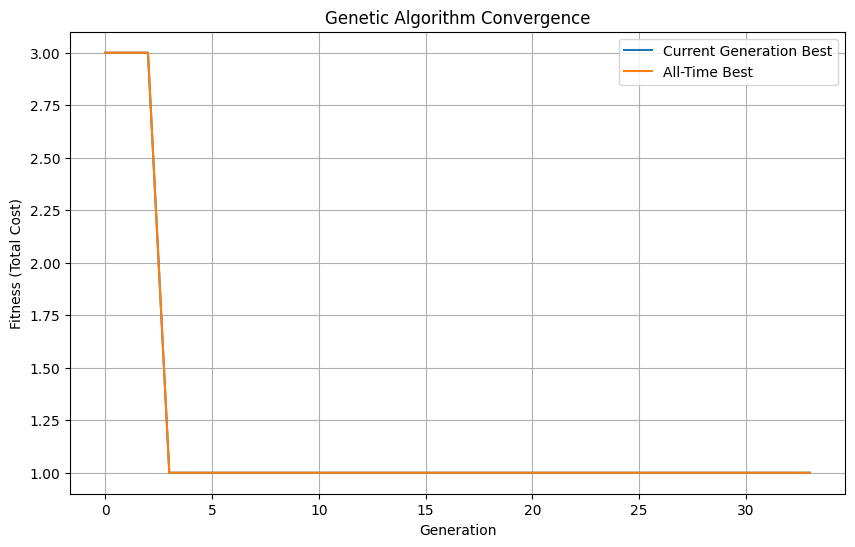

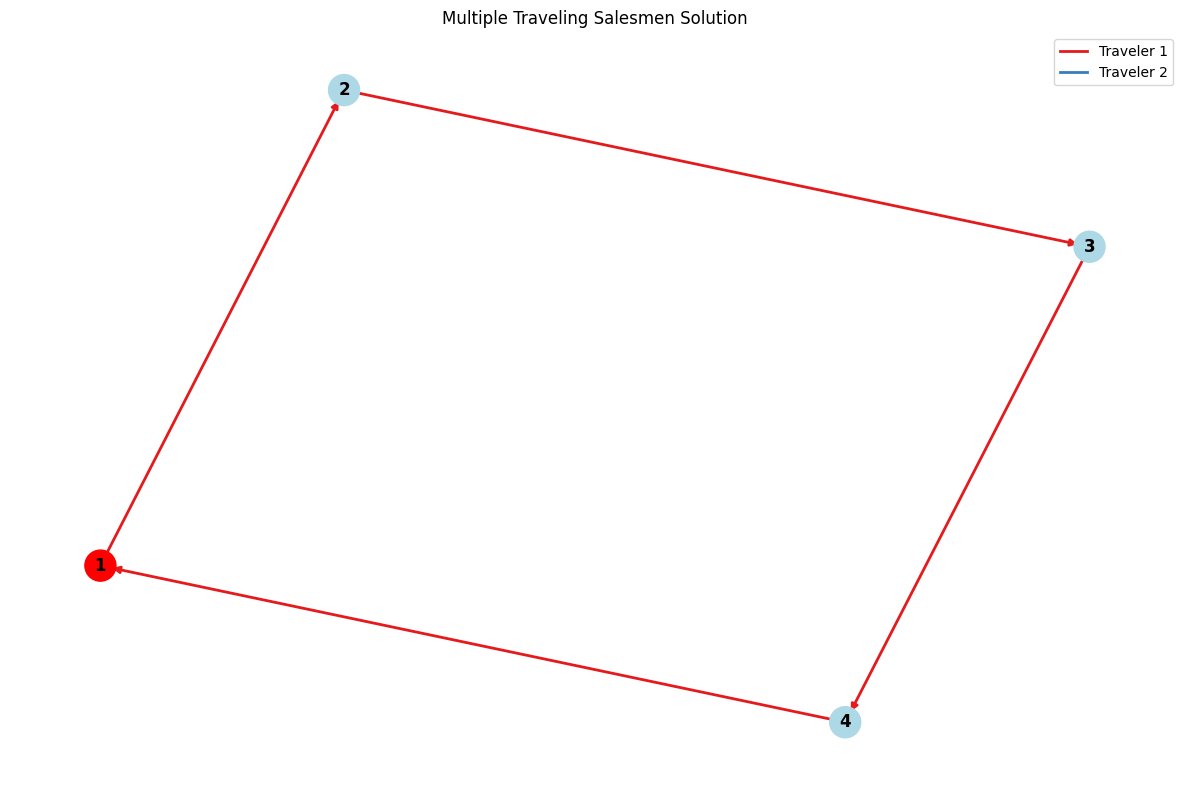

In [3]:
# Visualize Instance 1 results
ga_1.plot_convergence()
ga_1.plot_solution()

#### 2.0.2. Instance 2: Asymmetric from Symmetric (10 nodes, 3 travelers)

In [7]:
# Instance 2: Asymmetric matrix with 10 nodes
print("=" * 80)
print("INSTANCE 2: Asymmetric from Symmetric n=10")
print("=" * 80)

# Load cost matrix
cost_matrix_2 = read_cost_matrix_csv('cvrp_content-main/cost_matrix/asymmetric_from_symmetric_n10.csv')
num_cities_2 = len(cost_matrix_2)
num_travelers_2 = 3

print(f"Number of cities: {num_cities_2}")
print(f"Number of travelers: {num_travelers_2}")
print(f"Cost matrix shape: {cost_matrix_2.shape}\n")

# Create and run GA
ga_2 = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_2,
    num_cities=num_cities_2,
    num_travelers=num_travelers_2,
    depots=[1],
    population_size=100,
    generations=200,
    mutation_rate=0.2,
    crossover_rate=0.8,
    elitism_rate=0.1,
    tournament_size=5
)

# Solve
best_solution_2, best_fitness_2 = ga_2.solve(verbose=True, early_stopping_generations=40)

# Display results
print("\n" + ga_2.get_solution_details())
print("\n" + "=" * 80 + "\n")

INSTANCE 2: Asymmetric from Symmetric n=10
Number of cities: 9
Number of travelers: 3
Cost matrix shape: (9, 10)

Generation 0: Best Fitness = 337.00, Current Best = 337.00, Time = 0.01s
Generation 10: Best Fitness = 213.00, Current Best = 213.00, Time = 0.22s
Generation 20: Best Fitness = 213.00, Current Best = 213.00, Time = 0.32s
Generation 30: Best Fitness = 213.00, Current Best = 213.00, Time = 0.41s
Generation 40: Best Fitness = 213.00, Current Best = 213.00, Time = 0.50s
Early stopping at generation 47 due to no improvement for 40 generations.
Optimization complete. Best fitness: 213.00, Time: 0.57s

Solution Details:
Total Fitness (Cost): 213.00
Depot: 1

Traveler 1: 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 1. Cost: 85.00
Traveler 2: 1 -> 7 -> 8 -> 9 -> 1. Cost: 128.00
Traveler 3: No cities to visit. Cost: 0.00

Total Cost: 213.00




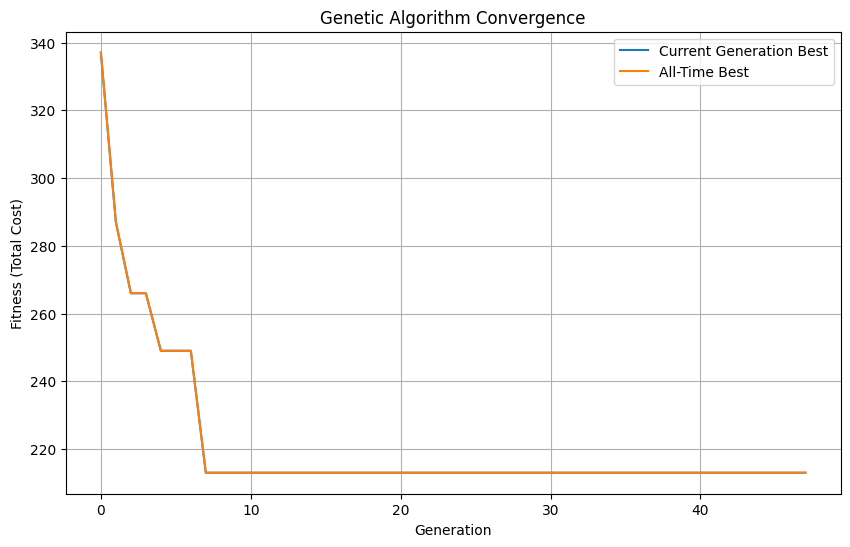

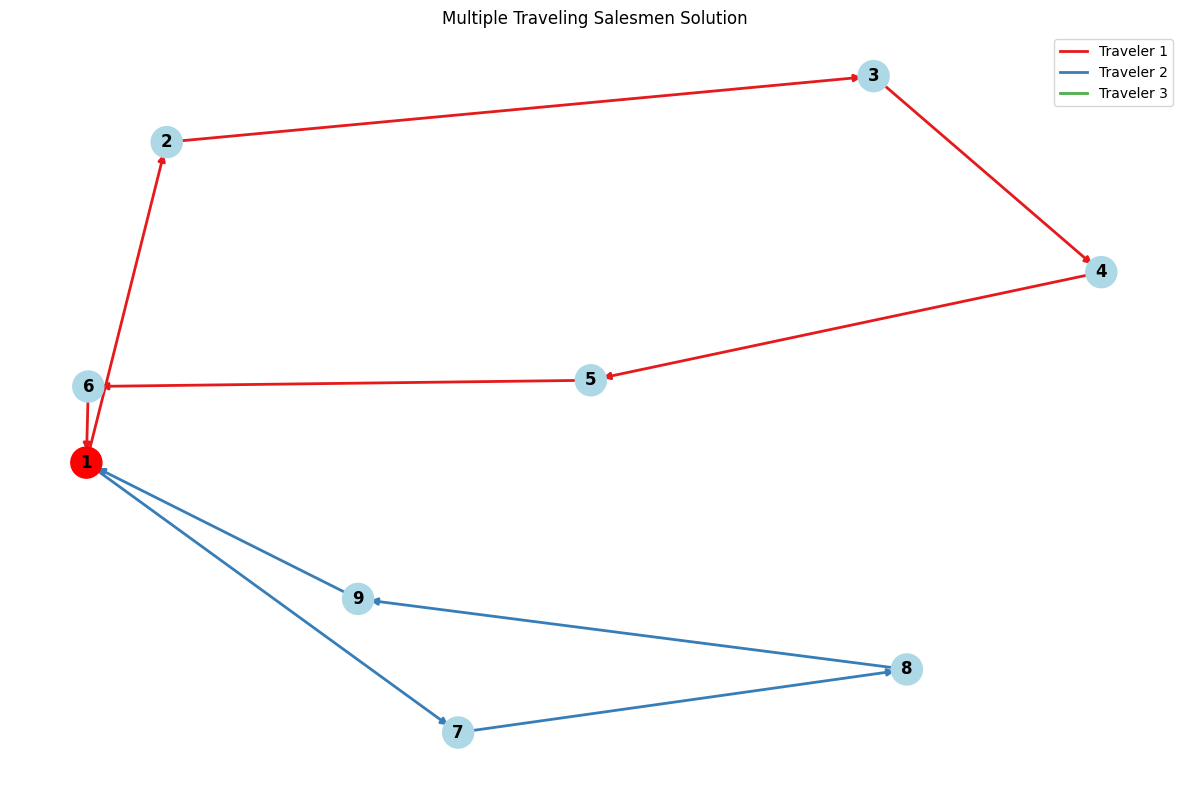

In [10]:
# Visualize Instance 2 results
ga_2.plot_convergence()
ga_2.plot_solution()

#### 2.0.3. Instance 3: Medium-sized Asymmetric (20 nodes, 4 travelers)

In [8]:
# Instance 3: Asymmetric matrix with 20 nodes
print("=" * 80)
print("INSTANCE 3: Asymmetric from Symmetric n=20")
print("=" * 80)

# Load cost matrix
cost_matrix_3 = read_cost_matrix_csv('cvrp_content-main/cost_matrix/asymmetric_from_symmetric_n20.csv')
num_cities_3 = len(cost_matrix_3)
num_travelers_3 = 4

print(f"Number of cities: {num_cities_3}")
print(f"Number of travelers: {num_travelers_3}")
print(f"Cost matrix shape: {cost_matrix_3.shape}\n")

# Create and run GA with increased parameters for medium instance
ga_3 = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_3,
    num_cities=num_cities_3,
    num_travelers=num_travelers_3,
    depots=[1],
    population_size=150,
    generations=300,
    mutation_rate=0.25,
    crossover_rate=0.85,
    elitism_rate=0.1,
    tournament_size=5
)

# Solve
best_solution_3, best_fitness_3 = ga_3.solve(verbose=True, early_stopping_generations=50)

# Display results
print("\n" + ga_3.get_solution_details())
print("\n" + "=" * 80 + "\n")

INSTANCE 3: Asymmetric from Symmetric n=20
Number of cities: 19
Number of travelers: 4
Cost matrix shape: (19, 20)

Generation 0: Best Fitness = 568.00, Current Best = 568.00, Time = 0.03s
Generation 10: Best Fitness = 436.00, Current Best = 436.00, Time = 0.43s
Generation 20: Best Fitness = 391.00, Current Best = 391.00, Time = 0.70s
Generation 30: Best Fitness = 391.00, Current Best = 391.00, Time = 0.95s
Generation 40: Best Fitness = 374.00, Current Best = 374.00, Time = 1.20s
Generation 50: Best Fitness = 374.00, Current Best = 374.00, Time = 1.46s
Generation 60: Best Fitness = 374.00, Current Best = 374.00, Time = 1.70s
Generation 70: Best Fitness = 374.00, Current Best = 374.00, Time = 1.95s
Generation 80: Best Fitness = 374.00, Current Best = 374.00, Time = 2.19s
Early stopping at generation 85 due to no improvement for 50 generations.
Optimization complete. Best fitness: 374.00, Time: 2.31s

Solution Details:
Total Fitness (Cost): 374.00
Depot: 1

Traveler 1: 1 -> 7 -> 6 -> 13 

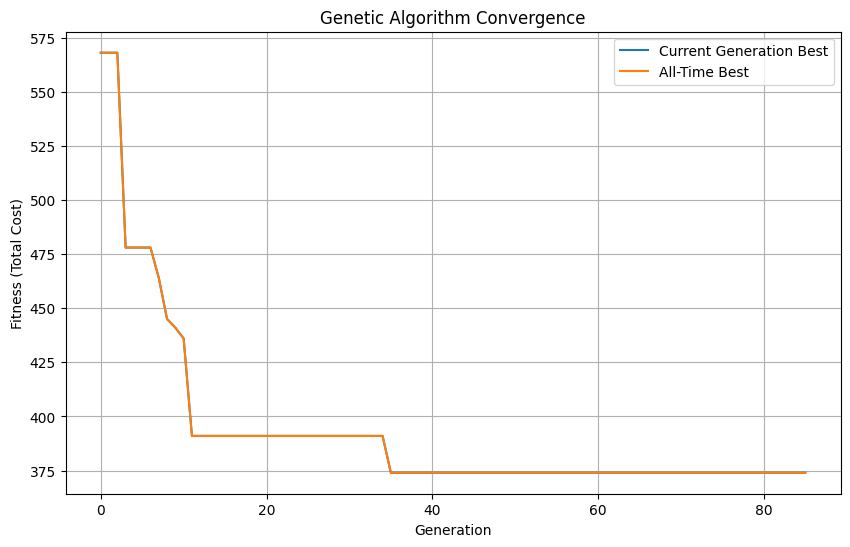

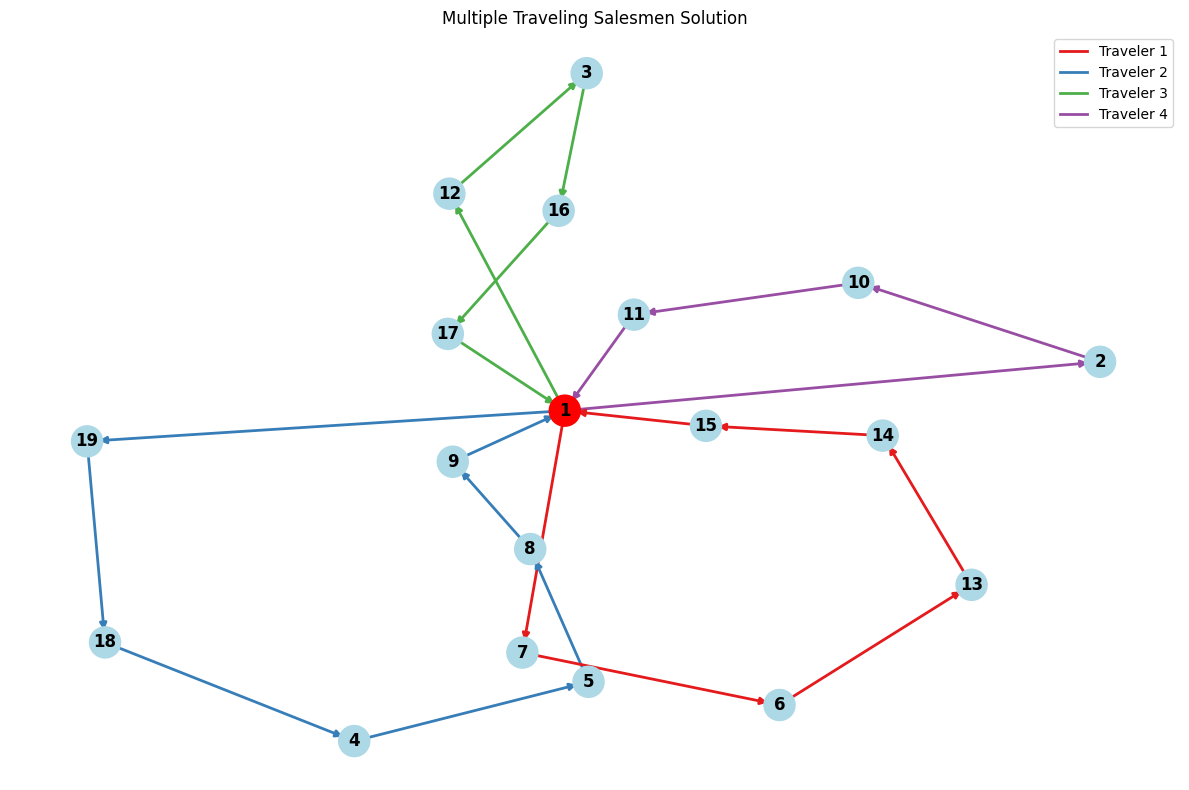

In [11]:
# Visualize Instance 3 results
ga_3.plot_convergence()
ga_3.plot_solution()

#### 2.0.4. Instance 4: Large Non-Metric Instance (100 nodes, 5 travelers)

In [12]:
# Instance 4: Large non-metric matrix with 100 nodes
print("=" * 80)
print("INSTANCE 4: Non-Metric n=100")
print("=" * 80)

# Load cost matrix
cost_matrix_4 = read_cost_matrix_csv('cvrp_content-main/cost_matrix/make_non_metric_n100.csv')
num_cities_4 = len(cost_matrix_4)
num_travelers_4 = 5

print(f"Number of cities: {num_cities_4}")
print(f"Number of travelers: {num_travelers_4}")
print(f"Cost matrix shape: {cost_matrix_4.shape}\n")

# Create and run GA with larger parameters for large instance
ga_4 = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_4,
    num_cities=num_cities_4,
    num_travelers=num_travelers_4,
    depots=[1],
    population_size=250,
    generations=500,
    mutation_rate=0.2,
    crossover_rate=0.8,
    elitism_rate=0.15,
    tournament_size=7
)

# Solve
best_solution_4, best_fitness_4 = ga_4.solve(verbose=True, early_stopping_generations=75)

# Display results
print("\n" + ga_4.get_solution_details())
print("\n" + "=" * 80 + "\n")

INSTANCE 4: Non-Metric n=100
Number of cities: 99
Number of travelers: 5
Cost matrix shape: (99, 100)

Generation 0: Best Fitness = 2377.00, Current Best = 2377.00, Time = 0.22s
Generation 10: Best Fitness = 2092.00, Current Best = 2092.00, Time = 2.16s
Generation 20: Best Fitness = 1879.00, Current Best = 1879.00, Time = 3.99s
Generation 30: Best Fitness = 1624.00, Current Best = 1624.00, Time = 5.79s
Generation 40: Best Fitness = 1441.00, Current Best = 1441.00, Time = 7.67s
Generation 50: Best Fitness = 1395.00, Current Best = 1395.00, Time = 9.11s
Generation 60: Best Fitness = 1282.00, Current Best = 1282.00, Time = 10.20s
Generation 70: Best Fitness = 1234.00, Current Best = 1234.00, Time = 11.30s
Generation 80: Best Fitness = 1181.00, Current Best = 1181.00, Time = 12.43s
Generation 90: Best Fitness = 1151.00, Current Best = 1151.00, Time = 13.53s
Generation 100: Best Fitness = 1113.00, Current Best = 1113.00, Time = 14.71s
Generation 110: Best Fitness = 1095.00, Current Best = 1

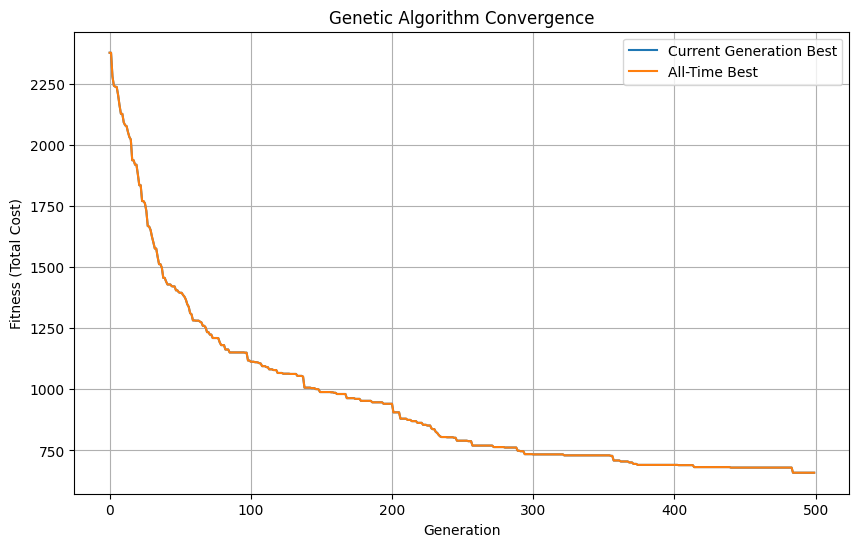

In [13]:
# Visualize Instance 4 results (convergence only - solution graph would be too crowded)
ga_4.plot_convergence()

#### 2.0.5. Instance 5: Comparison Across Different Configurations

In [14]:
# Instance 5: Parameter comparison on n=50 instance
print("=" * 80)
print("INSTANCE 5: Parameter Comparison on Asymmetric n=50")
print("=" * 80)

# Load cost matrix
cost_matrix_5 = read_cost_matrix_csv('cvrp_content-main/cost_matrix/asymmetric_from_symmetric_n50.csv')
num_cities_5 = len(cost_matrix_5)
num_travelers_5 = 5

print(f"Number of cities: {num_cities_5}")
print(f"Number of travelers: {num_travelers_5}\n")

# Configuration 1: Low mutation rate
print("-" * 80)
print("Configuration 1: Low Mutation Rate (0.1)")
print("-" * 80)
ga_5a = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_5,
    num_cities=num_cities_5,
    num_travelers=num_travelers_5,
    depots=[1],
    population_size=200,
    generations=300,
    mutation_rate=0.1,  # Low mutation
    crossover_rate=0.9,
    elitism_rate=0.1,
    tournament_size=5
)
best_solution_5a, best_fitness_5a = ga_5a.solve(verbose=False, early_stopping_generations=60)
print(f"Best fitness: {best_fitness_5a:.2f}\n")

# Configuration 2: High mutation rate
print("-" * 80)
print("Configuration 2: High Mutation Rate (0.3)")
print("-" * 80)
ga_5b = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_5,
    num_cities=num_cities_5,
    num_travelers=num_travelers_5,
    depots=[1],
    population_size=200,
    generations=300,
    mutation_rate=0.3,  # High mutation
    crossover_rate=0.9,
    elitism_rate=0.1,
    tournament_size=5
)
best_solution_5b, best_fitness_5b = ga_5b.solve(verbose=False, early_stopping_generations=60)
print(f"Best fitness: {best_fitness_5b:.2f}\n")

# Configuration 3: Larger population
print("-" * 80)
print("Configuration 3: Larger Population (400)")
print("-" * 80)
ga_5c = GeneticAlgorithmMTSP(
    cost_matrix=cost_matrix_5,
    num_cities=num_cities_5,
    num_travelers=num_travelers_5,
    depots=[1],
    population_size=400,  # Larger population
    generations=200,
    mutation_rate=0.2,
    crossover_rate=0.9,
    elitism_rate=0.1,
    tournament_size=5
)
best_solution_5c, best_fitness_5c = ga_5c.solve(verbose=False, early_stopping_generations=60)
print(f"Best fitness: {best_fitness_5c:.2f}\n")

# Compare results
print("=" * 80)
print("COMPARISON SUMMARY")
print("=" * 80)
print(f"Configuration 1 (Low Mutation):     {best_fitness_5a:.2f}")
print(f"Configuration 2 (High Mutation):    {best_fitness_5b:.2f}")
print(f"Configuration 3 (Large Population): {best_fitness_5c:.2f}")
print("=" * 80)

INSTANCE 5: Parameter Comparison on Asymmetric n=50
Number of cities: 49
Number of travelers: 5

--------------------------------------------------------------------------------
Configuration 1: Low Mutation Rate (0.1)
--------------------------------------------------------------------------------
Best fitness: 699.00

--------------------------------------------------------------------------------
Configuration 2: High Mutation Rate (0.3)
--------------------------------------------------------------------------------
Best fitness: 536.00

--------------------------------------------------------------------------------
Configuration 3: Larger Population (400)
--------------------------------------------------------------------------------
Best fitness: 681.00

COMPARISON SUMMARY
Configuration 1 (Low Mutation):     699.00
Configuration 2 (High Mutation):    536.00
Configuration 3 (Large Population): 681.00


### 2.1. Descripción detallada del método metaheurístico implementado
### 2.2. Estrategias de representación y operadores
### 2.3. Proceso de calibración de parámetros


## 3. Resultados Experimentales

### 3.1. Configuración experimental


### 3.2. Presentación de resultados por método


### 3.3. Análisis comparativo con soluciones Pyomo


### 3.4. Visualizaciones y gráficos relevantes

## 4. Análisis de Escalabilidad


### 4.1. Rendimiento en instancias de diferentes tamaños


### 4.2. Límites prácticos de aplicabilidad


### 4.3. Estrategias para mejorar la escalabilidad


## 5. Discusión
### 5.1. Ventajas y desventajas de cada enfoque

### 5.2. Recomendaciones para diferentes escenarios

### 5.3. Lecciones aprendidas y desafíos encontrados

## 6. Conclusiones
### 6.1. Resumen de hallazgos principales

### 6.2. Respuestas a preguntas estratégicas

### 6.3. Direcciones futuras de investigación